# Creation of an artificial neural network from scratch

This notebook currently contains a very basic implementation of an artificial neural network from scratch. 
The first cell contains

1. A definition of several activation functions and their derivatives.
2. A definition of a loss function and its derivative.
3. A definition of the forward propagation through a single layer
4. A definition of a backward propagation through a single layer


Your task is to do the following extentions to the code in this cell:

1. Add support for an additional activation function.
2. Add the use of a bias in the forward- and backward-propagation. 
As it is implemented now, all solutions have to pass the origin.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12345) # Set initial random seed (good to always do)



# Activation functions, the parameter f decides which activation function that is used.
# TODO: Add at least one new activation function and its derivative.
def activate(a, f="none"):
    
    if f=="none":
        y = a
    elif f == "relu":
        y = np.maximum(a,0)
    elif f == "sigmoid":
        y = 1/(1 + np.exp (-a))
    return y
    

    
# Derivatives of activation functions
def d_activate(a, f="none"):
    if f=="none":
        dy = np.ones_like(a)
    elif f == "relu":
        dy = 1 * (a > 0)
    elif f == "sigmoid":
        dy = (1/(1 + np.exp (-a))) * (1 - (1/(1 + np.exp (-a))))
    return dy


# This is the loss for a set of predictions y_hat compared to a set of real valyes y
def MSE_loss(y_hat, y):
    return 1/2 * np.mean((y_hat-y)**2)


# This is the derivative of the loss with respect to the predicted value y_hat
def d_MSE_loss(y_hat, y):
    m = y.shape[0]
    return 1./m * (y_hat-y)


# Propagate a signal through a layer in a neueral network.
# TODO: Add support for the use of a bias as well
def propagate_forward(w, b, a, f="none"):
    z = activate(np.dot(a,w)+b, f)
    return z
    

# Calculate the backward gradients that are passed throught the layer in the backward pass.
# Returns both the derivative of the loss in respect to the weights w and the input signal a.
# TODO: Add support for a bias as well
def propagate_backward(w, b, a, dl_dz, f="none"):
    
    dl = d_activate(np.dot(a,w)+b, f) * dl_dz
    dw = np.dot(a.T, dl)
    da = np.dot(dl, w.T)
    
    return dw, da



## An implementation of a neural network

Below is an implementation of a MLP neural network. This implementation is still lacking several details that are needed for the network to be robust and function well. Your task is to improve it with the following:

1. Add a bias to the activation functions that are fine tuned during training. 
2. Add a function that trains the network using minibatches (the network only trains on a few samples at a time) 
3. Optional: Make use of an validation set in the training function. The model should hence stop training when the loss starts to increase for the validation set.


In [43]:
from sklearn.model_selection import train_test_split

# A class for a neural network
class NeuralNet(object):
    
    # Setup all parameters and activation functions.
    # TODO: Add support for a bias for each neuron
    def __init__ (self, input_dim, output_dim, neurons, function = "relu"):
        
        self.ws = [np.random.normal(0,2,(n,m)) for n,m in
                   zip([input_dim] + neurons, neurons + [output_dim])]
        self.bs = np.random.normal(0,2,len(neurons)+1)
        self.activations = [function] * len(neurons) + ["none"]
    
    
    # Predict the input throught the network and calculate the output.
    # TODO: Add support for a bias for each neuron
    def forward(self, x):
        for w,b,f in zip(self.ws, self.bs, self.activations):
            x = propagate_forward(w,b,x,f)
        return x
    
    
    # Adjust the weights in the network to better fit the desired output (y), given the input (x).
    # alpha is the learning learning.
    # TODO: Add support for a bias for each neuron and make sure these are learnt as well.
    def adjust_weights(self, x, y, alpha=1e-4):
                
        a = x
        al = []
        
        for w,b,f in zip(self.ws, self.bs, self.activations):
            al.append(a)
            a = propagate_forward(w,b,a,f)
           
        
        loss = MSE_loss(a,y)
        da = d_MSE_loss(a,y)
        
        for w,b,f,x in reversed(list(zip(self.ws, self.bs, self.activations, al))):

            dw, da = propagate_backward(w,b,x,da,f)
            w -= alpha * dw
            b -= alpha * da
                        
        return loss
    
    
    # A function for the training of the network.
    # TODO: Add a training loop where the weights and biases of the network is learnt over several epochs.
    # TODO: Add support for mini batches. That is, in each epoch the data should be split into several
    #       smaller subsets and the model should be trained on each of these subsets one at a time.
    # TODO: Optionally split the training data into training data and validation data.
    #       The validation data should be used to stop the training when the model stops to generalise and
    #       starts to overfit.
    def train_net(self, x, y, batch_size=64, epochs=100):
        loss = []
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        n = x.shape[0]/batch_size
        
        for epoch in range(epochs):       
            for batch in range(batch_size):
                batch_train_x = train_x[n*batch : (n+1)*batch]
                batch_train_y = train_y[n*batch : (n+1)*batch]                
                adjust_weights(batch_train_x,batch_train_y)
            
            epoch_loss = adjust_weights(test_x,test_y)
            loss.append(epoch_loss)
            if epoch_loss > min(loss):
                break



## Main programs

This cell should contain your different programs. In this cell you should present:

1. At least 3 programs where the neural network is applied to 3 different datasets.
2. You should also have at least 2 programs where you fine tune 2 hyper-parameters.

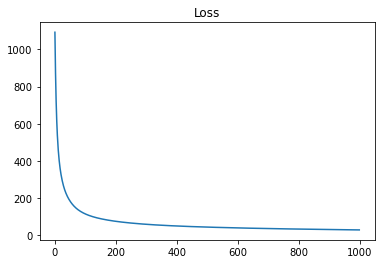

In [7]:
# A simple example program

def main1():
    np.random.seed(1234) # Set initial random seed (good to always do)
    n = 1000
    d = 4

    k = np.random.randint(0,10,(d,1))
    x = np.random.normal(0,1,(n,d))
    y = np.dot(x,k) + 0.1 + np.random.normal(0,0.01,(n,1))
    
                         
    nn = NeuralNet(d, 1, [18, 12])
    
    plt.plot([nn.adjust_weights(x, y) for _ in range(1000)])
    plt.title("Loss")
    plt.show()

    

main1()

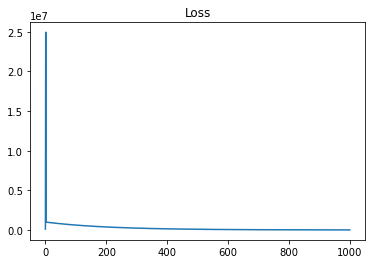

In [30]:
from sklearn.datasets import load_iris

def dataset_1():
    np.random.seed(1234)
    
    iris = load_iris()
    x_1, y_1 = iris.data, iris.target
    y_1 =np.reshape(y_1, [150,1])
    d = len(x_1[0])
    
    nn_1 = NeuralNet(d, 1, [18, 12])
    plt.plot([nn_1.adjust_weights(x_1, y_1) for _ in range(1000)])
    plt.title("Loss")
    plt.show()

    

dataset_1()


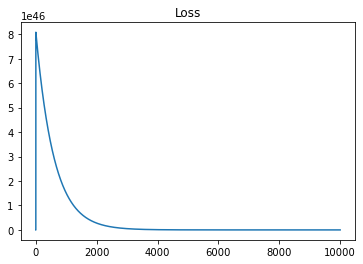

In [39]:
from sklearn.datasets import load_wine

def dataset_2():
    np.random.seed(1234)
    
    wine = load_wine()
    x_2, y_2 = wine.data, wine.target
    d = len(x_2[0])
    n = x_2.shape[0]
    y_2 =np.reshape(y_2, [n,1])
    
    nn_2 = NeuralNet(d, 1, [18, 12])
    plt.plot([nn_2.adjust_weights(x_2, y_2) for _ in range(10000)])
    plt.title("Loss")
    plt.show()

    

dataset_2()

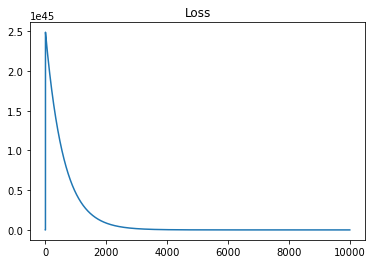

In [41]:
from sklearn.datasets import load_boston

def dataset_3():
    np.random.seed(1234)
    
    boston = load_boston()
    x_3, y_3 = boston.data, boston.target
    d = len(x_3[0])
    n = x_3.shape[0]
    y_3 =np.reshape(y_3, [n,1])
    
    nn_3 = NeuralNet(d, 1, [18, 12])
    plt.plot([nn_3.adjust_weights(x_3, y_3) for _ in range(10000)])
    plt.title("Loss")
    plt.show()

    

dataset_3()

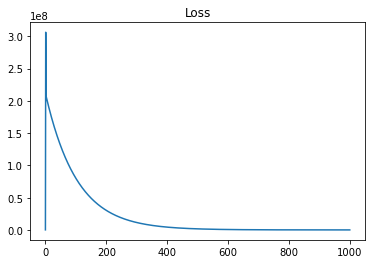

In [42]:
from sklearn.datasets import load_iris

def dataset_1():
    np.random.seed(1234)
    
    iris = load_iris()
    x_1, y_1 = iris.data, iris.target
    y_1 =np.reshape(y_1, [150,1])
    d = len(x_1[0])
    
    nn_1 = NeuralNet(d, 1, [18, 12])
    plt.plot([nn_1.adjust_weights(x_1, y_1, 2e-4) for _ in range(1000)])
    plt.title("Loss")
    plt.show()

    

dataset_1()

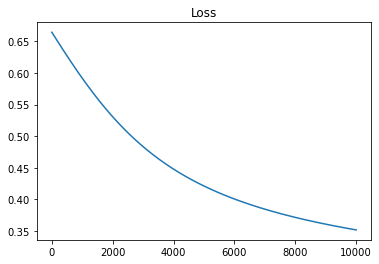

In [46]:
from sklearn.datasets import load_iris

def dataset_1():
    np.random.seed(1234)
    
    iris = load_iris()
    x_1, y_1 = iris.data, iris.target
    y_1 =np.reshape(y_1, [150,1])
    d = len(x_1[0])
    
    nn_1 = NeuralNet(d, 1, [18, 12], "sigmoid")
    plt.plot([nn_1.adjust_weights(x_1, y_1, 1e-4) for _ in range(10000)])
    plt.title("Loss")
    plt.show()

    

dataset_1()